Imports

In [76]:
import cv2
import numpy as np
import skimage
import imageio
import mpmath
import matplotlib.pyplot as plt
import seaborn as sns
import PIL

Read and Display Images

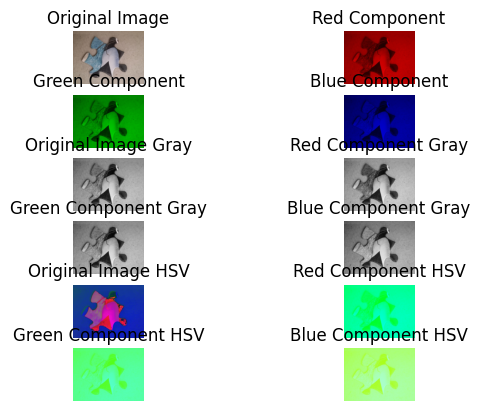

In [77]:
img = cv2.imread('Images/image-35.jpg')
img = img[:,:,::-1]
red, green, blue = cv2.split(img)
empty = red * 0

red_image = cv2.merge([red, empty, empty])
green_image = cv2.merge([empty, green, empty])
blue_image = cv2.merge([empty, empty, blue])

plt.subplot(6, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(6, 2, 2)
plt.imshow(red_image)
plt.title('Red Component')
plt.axis('off')

plt.subplot(6, 2, 3)
plt.imshow(green_image)
plt.title('Green Component')
plt.axis('off')

plt.subplot(6, 2, 4)
plt.imshow(blue_image)
plt.title('Blue Component')
plt.axis('off')

plt.subplot(6, 2, 5)
plt.imshow(skimage.color.rgb2gray(img),cmap="gray")
plt.title('Original Image Gray')
plt.axis('off')

plt.subplot(6, 2, 6)
plt.imshow(skimage.color.rgb2gray(red_image),cmap="gray")
plt.title('Red Component Gray')
plt.axis('off')

plt.subplot(6, 2, 7)
plt.imshow(skimage.color.rgb2gray(green_image),cmap="gray")
plt.title('Green Component Gray')
plt.axis('off')

plt.subplot(6, 2, 8)
plt.imshow(skimage.color.rgb2gray(blue_image),cmap="gray")
plt.title('Blue Component Gray')
plt.axis('off')

plt.subplot(6, 2, 9)
plt.imshow(skimage.color.rgb2hsv(img))
plt.title('Original Image HSV')
plt.axis('off')

plt.subplot(6, 2, 10)
plt.imshow(skimage.color.rgb2hsv(red_image))
plt.title('Red Component HSV')
plt.axis('off')

plt.subplot(6, 2, 11)
plt.imshow(skimage.color.rgb2hsv(green_image))
plt.title('Green Component HSV')
plt.axis('off')

plt.subplot(6, 2, 12)
plt.imshow(skimage.color.rgb2hsv(blue_image))
plt.title('Blue Component HSV')
plt.axis('off')

plt.show()


Section 4

In [78]:
print("1. Dimensions:",img.shape)
mask = skimage.color.rgb2gray(cv2.imread('Images/mask-35.png'))
white_pix = np.sum(mask==1)
print("2. Num white pixels:",white_pix)

#=========================================================================

gray_img = skimage.color.rgb2gray(img)
print("3. Max value in grayscale(Noramalized):",np.max(gray_img))

img_with_mask = gray_img*mask
print("4. Max pixel in puzzel(Normalized):",np.max(img_with_mask))

print("5. Mean intensity for image:",np.mean(gray_img))

print("6. Mean brightness of puzzle pixels",np.mean(gray_img[mask == 1]))

print("7. Mean brightness of background pixels",np.mean(gray_img[mask != 1]))

print("8. Variance of puzzle pixels",np.var(gray_img[mask == 1]))
print("9. Variance of bakground pixels",np.var(gray_img[mask != 1]))

1. Dimensions: (450, 600, 3)
2. Num white pixels: 73196
3. Max value in grayscale(Noramalized): 0.8985443137254902
4. Max pixel in puzzel(Normalized): 0.8985443137254902
5. Mean intensity for image: 0.5384709828395062
6. Mean brightness of puzzle pixels 0.4428718293081482
7. Mean brightness of background pixels 0.5740265388336999
8. Variance of puzzle pixels 0.03828601259838955
9. Variance of bakground pixels 0.008189250151975785


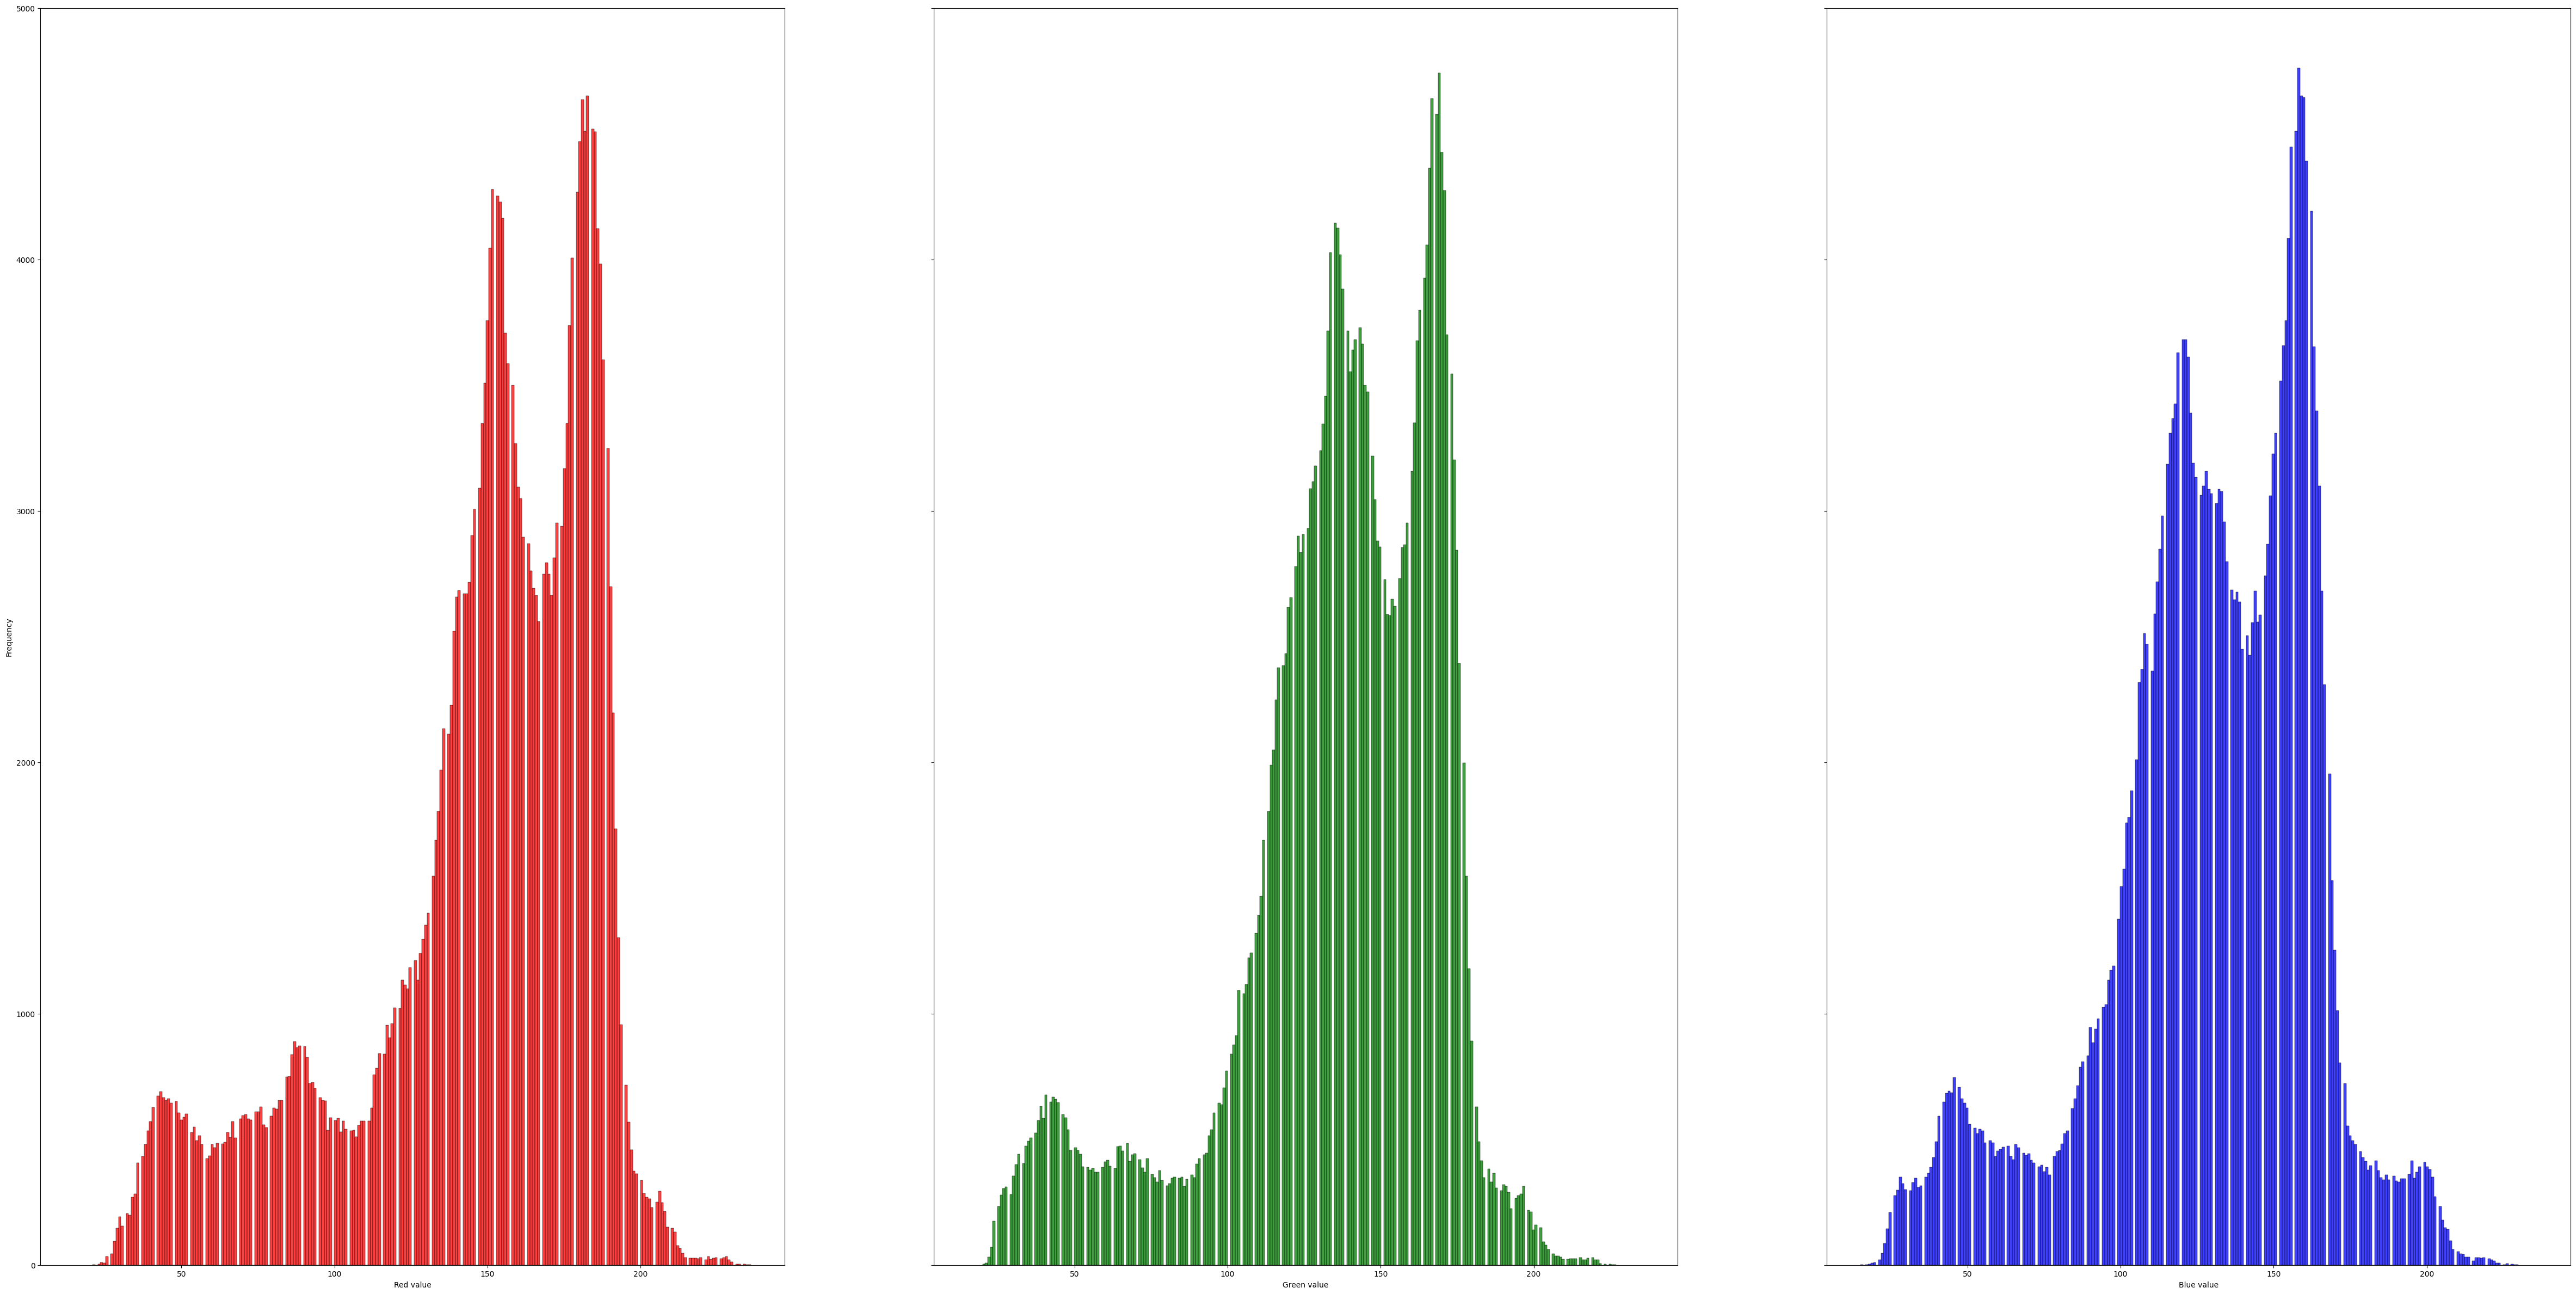

In [79]:
red_hist =  red.flatten()
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(60,30), sharex=True, sharey=True)
plt.subplot(1,3,1)
sns.histplot( red_hist, bins=256, kde=False,color='red')
plt.xlabel("Red value")
plt.ylabel("Frequency")

green_hist =  green.flatten()

plt.subplot(1,3,2)
sns.histplot( green_hist, bins=256, kde=False,color='green')
plt.xlabel("Green value")
plt.ylabel("Frequency")

blue_hist =  blue.flatten()

plt.subplot(1,3,3)
sns.histplot( blue_hist, bins=256, kde=False,color='blue')
plt.xlabel("Blue value")
plt.ylabel("Frequency")
plt.show()

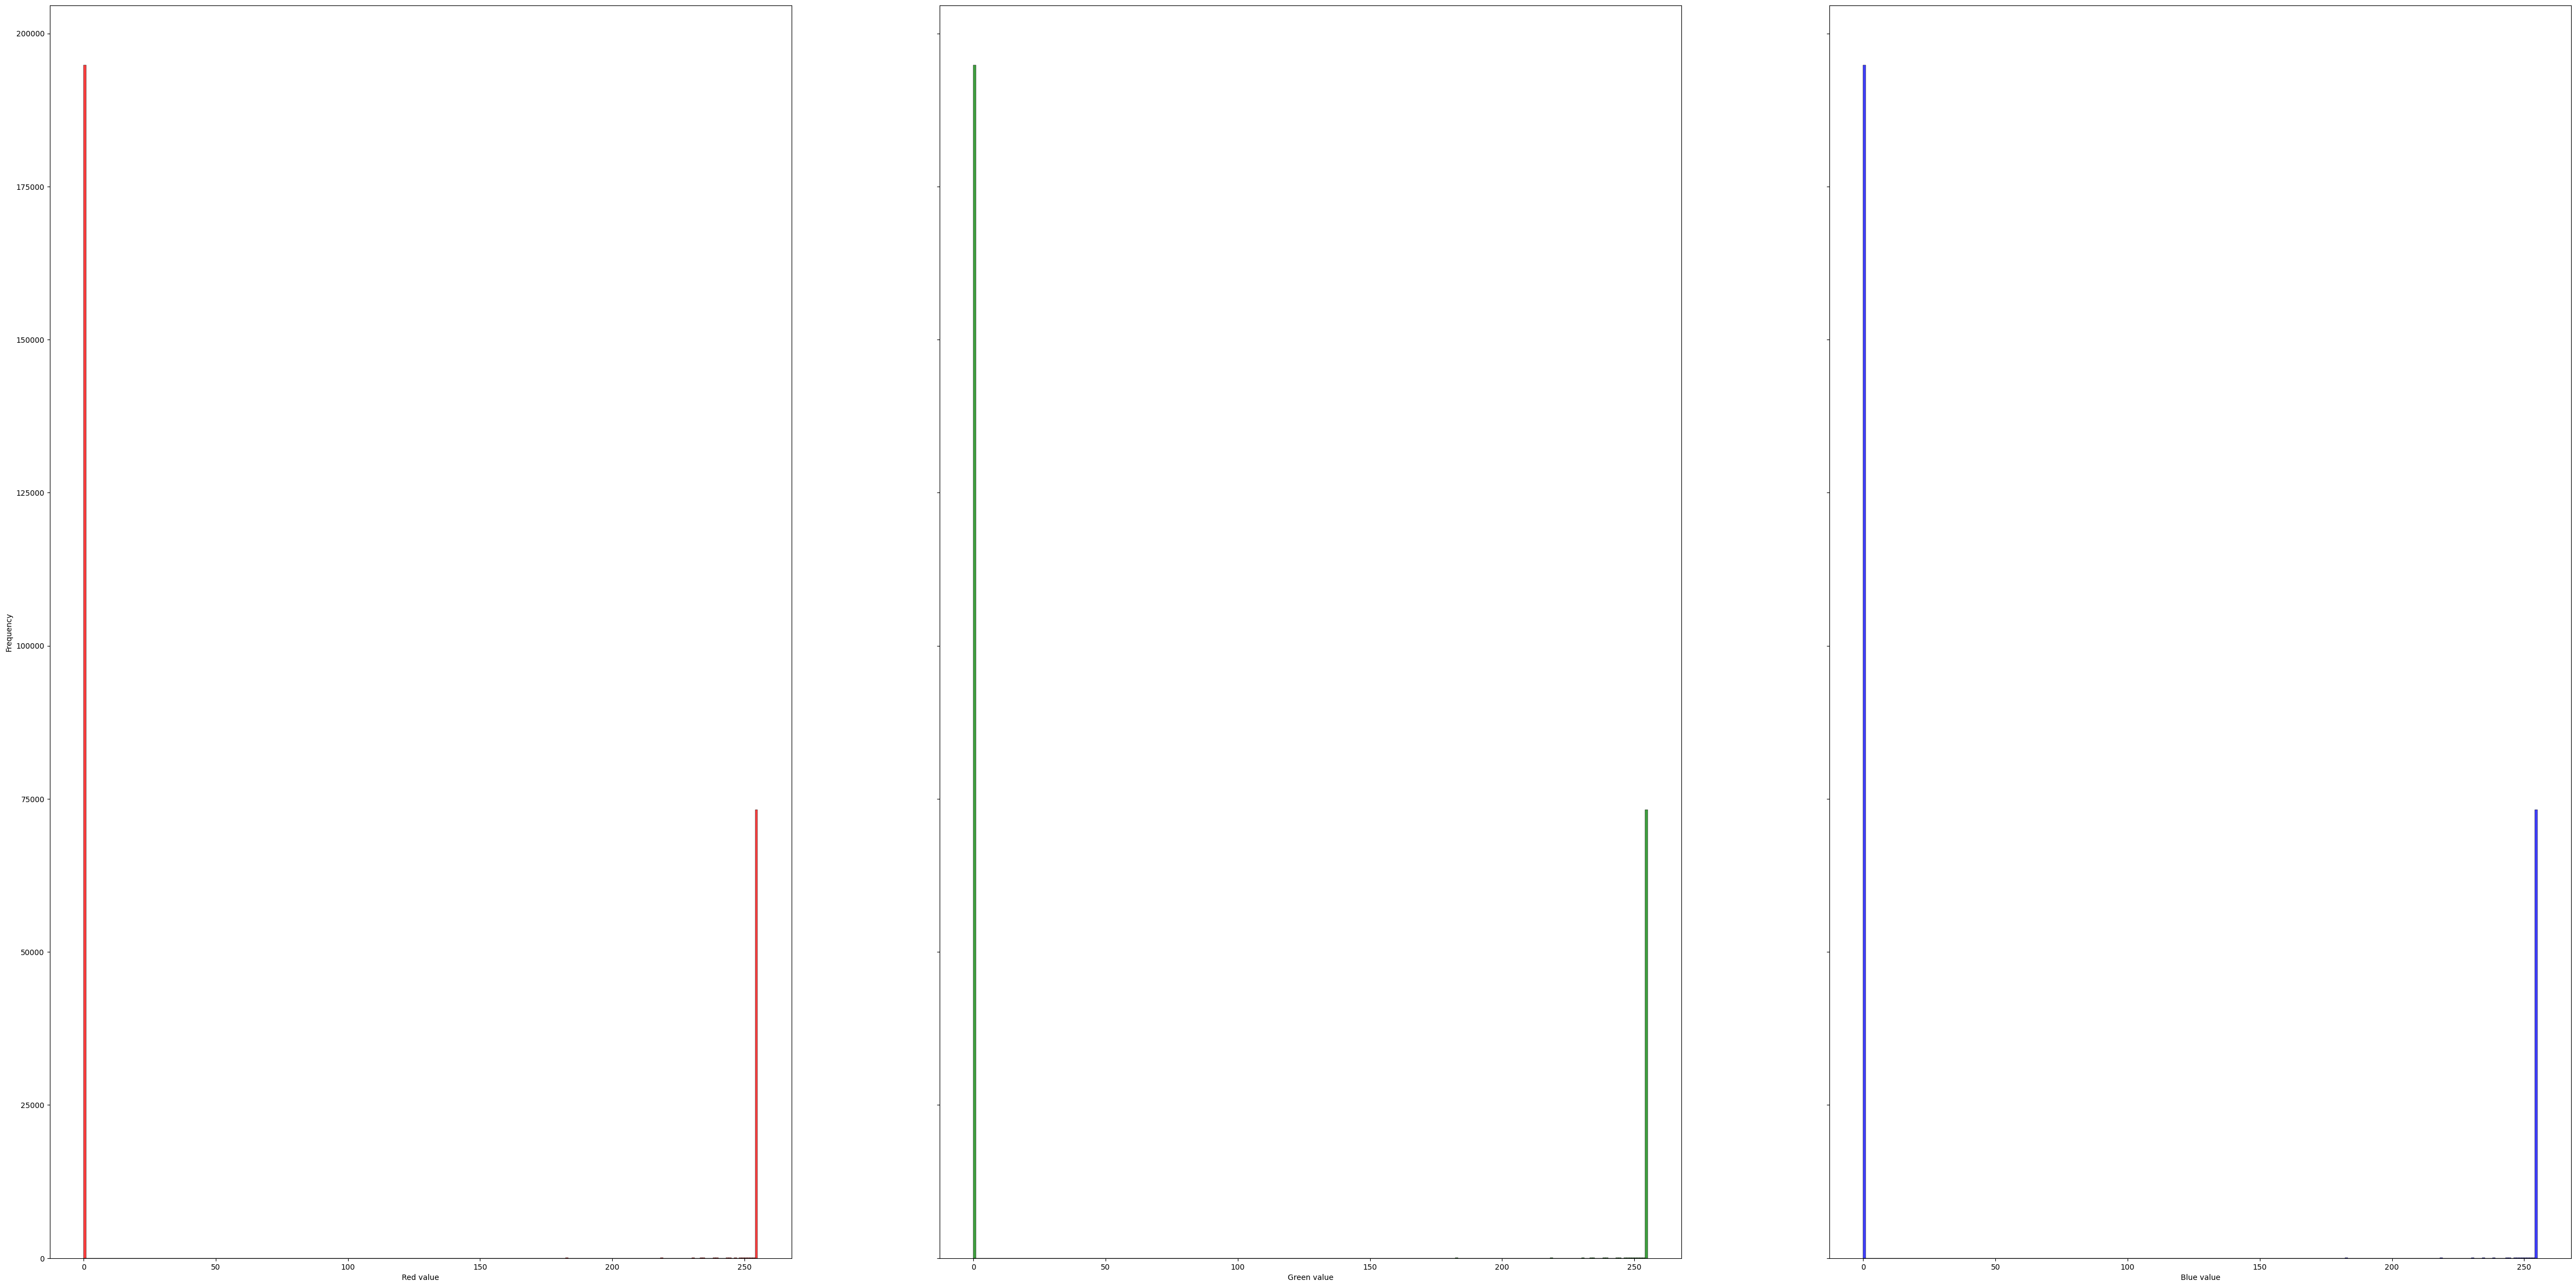

In [80]:
mask = cv2.imread("Images/mask-35.png")
mask = mask[:,:,::-1]

m_red ,m_green ,m_blue  = cv2.split(mask)

red_hist =  m_red.flatten()
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(60,30), sharex=True, sharey=True)
plt.subplot(1,3,1)
sns.histplot( red_hist, bins=256, kde=False,color='red')
plt.xlabel("Red value")
plt.ylabel("Frequency")

green_hist =  m_green.flatten()

plt.subplot(1,3,2)
sns.histplot( green_hist, bins=256, kde=False,color='green')
plt.xlabel("Green value")
plt.ylabel("Frequency")

blue_hist =  m_blue.flatten()

plt.subplot(1,3,3)
sns.histplot( blue_hist, bins=256, kde=False,color='blue')
plt.xlabel("Blue value")
plt.ylabel("Frequency")
plt.show()

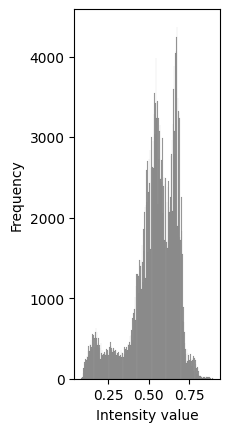

In [81]:
gray_hist =  gray_img.flatten()

plt.subplot(1,3,3)
sns.histplot( gray_hist, bins=256, kde=False,color='gray')
plt.xlabel("Intensity value")
plt.ylabel("Frequency")
plt.show()

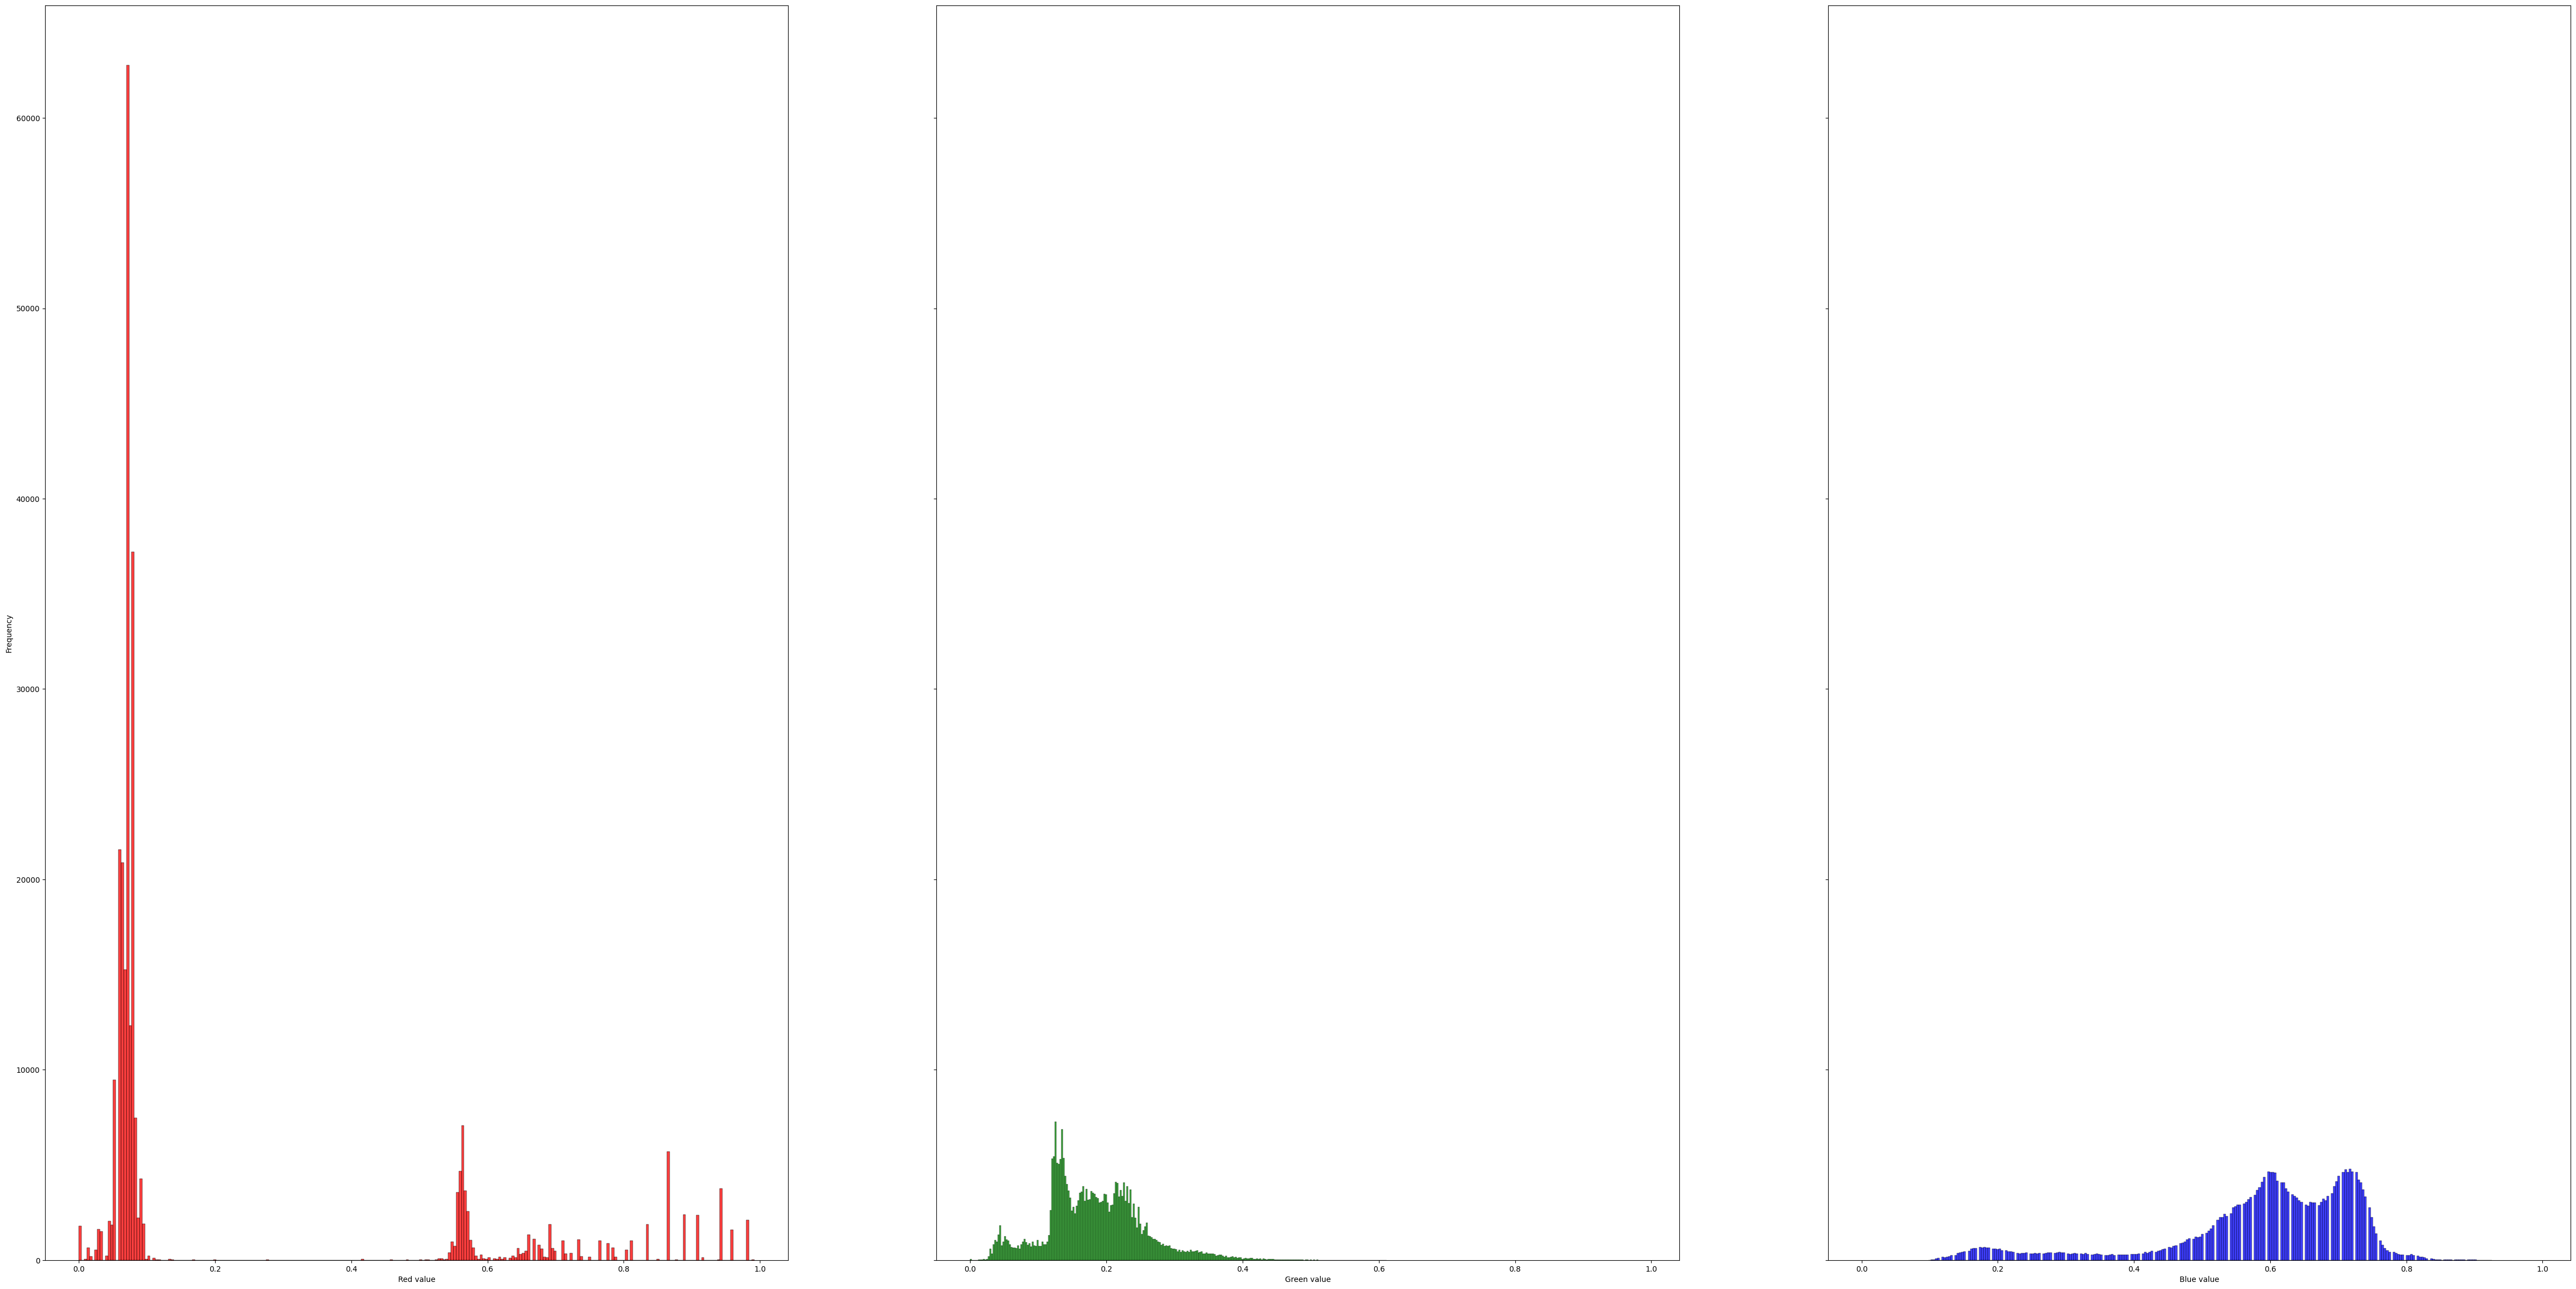

In [82]:
hsvimage = skimage.color.rgb2hsv(img)

red_hsv, green_hsv, blue_hsv = cv2.split(hsvimage)

red_hist =  red_hsv.flatten()
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(60,30), sharex=True, sharey=True)
plt.subplot(1,3,1)
sns.histplot( red_hist, bins=256, kde=False,color='red')
plt.xlabel("Red value")
plt.ylabel("Frequency")

green_hist =  green_hsv.flatten()

plt.subplot(1,3,2)
sns.histplot( green_hist, bins=256, kde=False,color='green')
plt.xlabel("Green value")
plt.ylabel("Frequency")

blue_hist =  blue_hsv.flatten()

plt.subplot(1,3,3)
sns.histplot( blue_hist, bins=256, kde=False,color='blue')
plt.xlabel("Blue value")
plt.ylabel("Frequency")
plt.show()

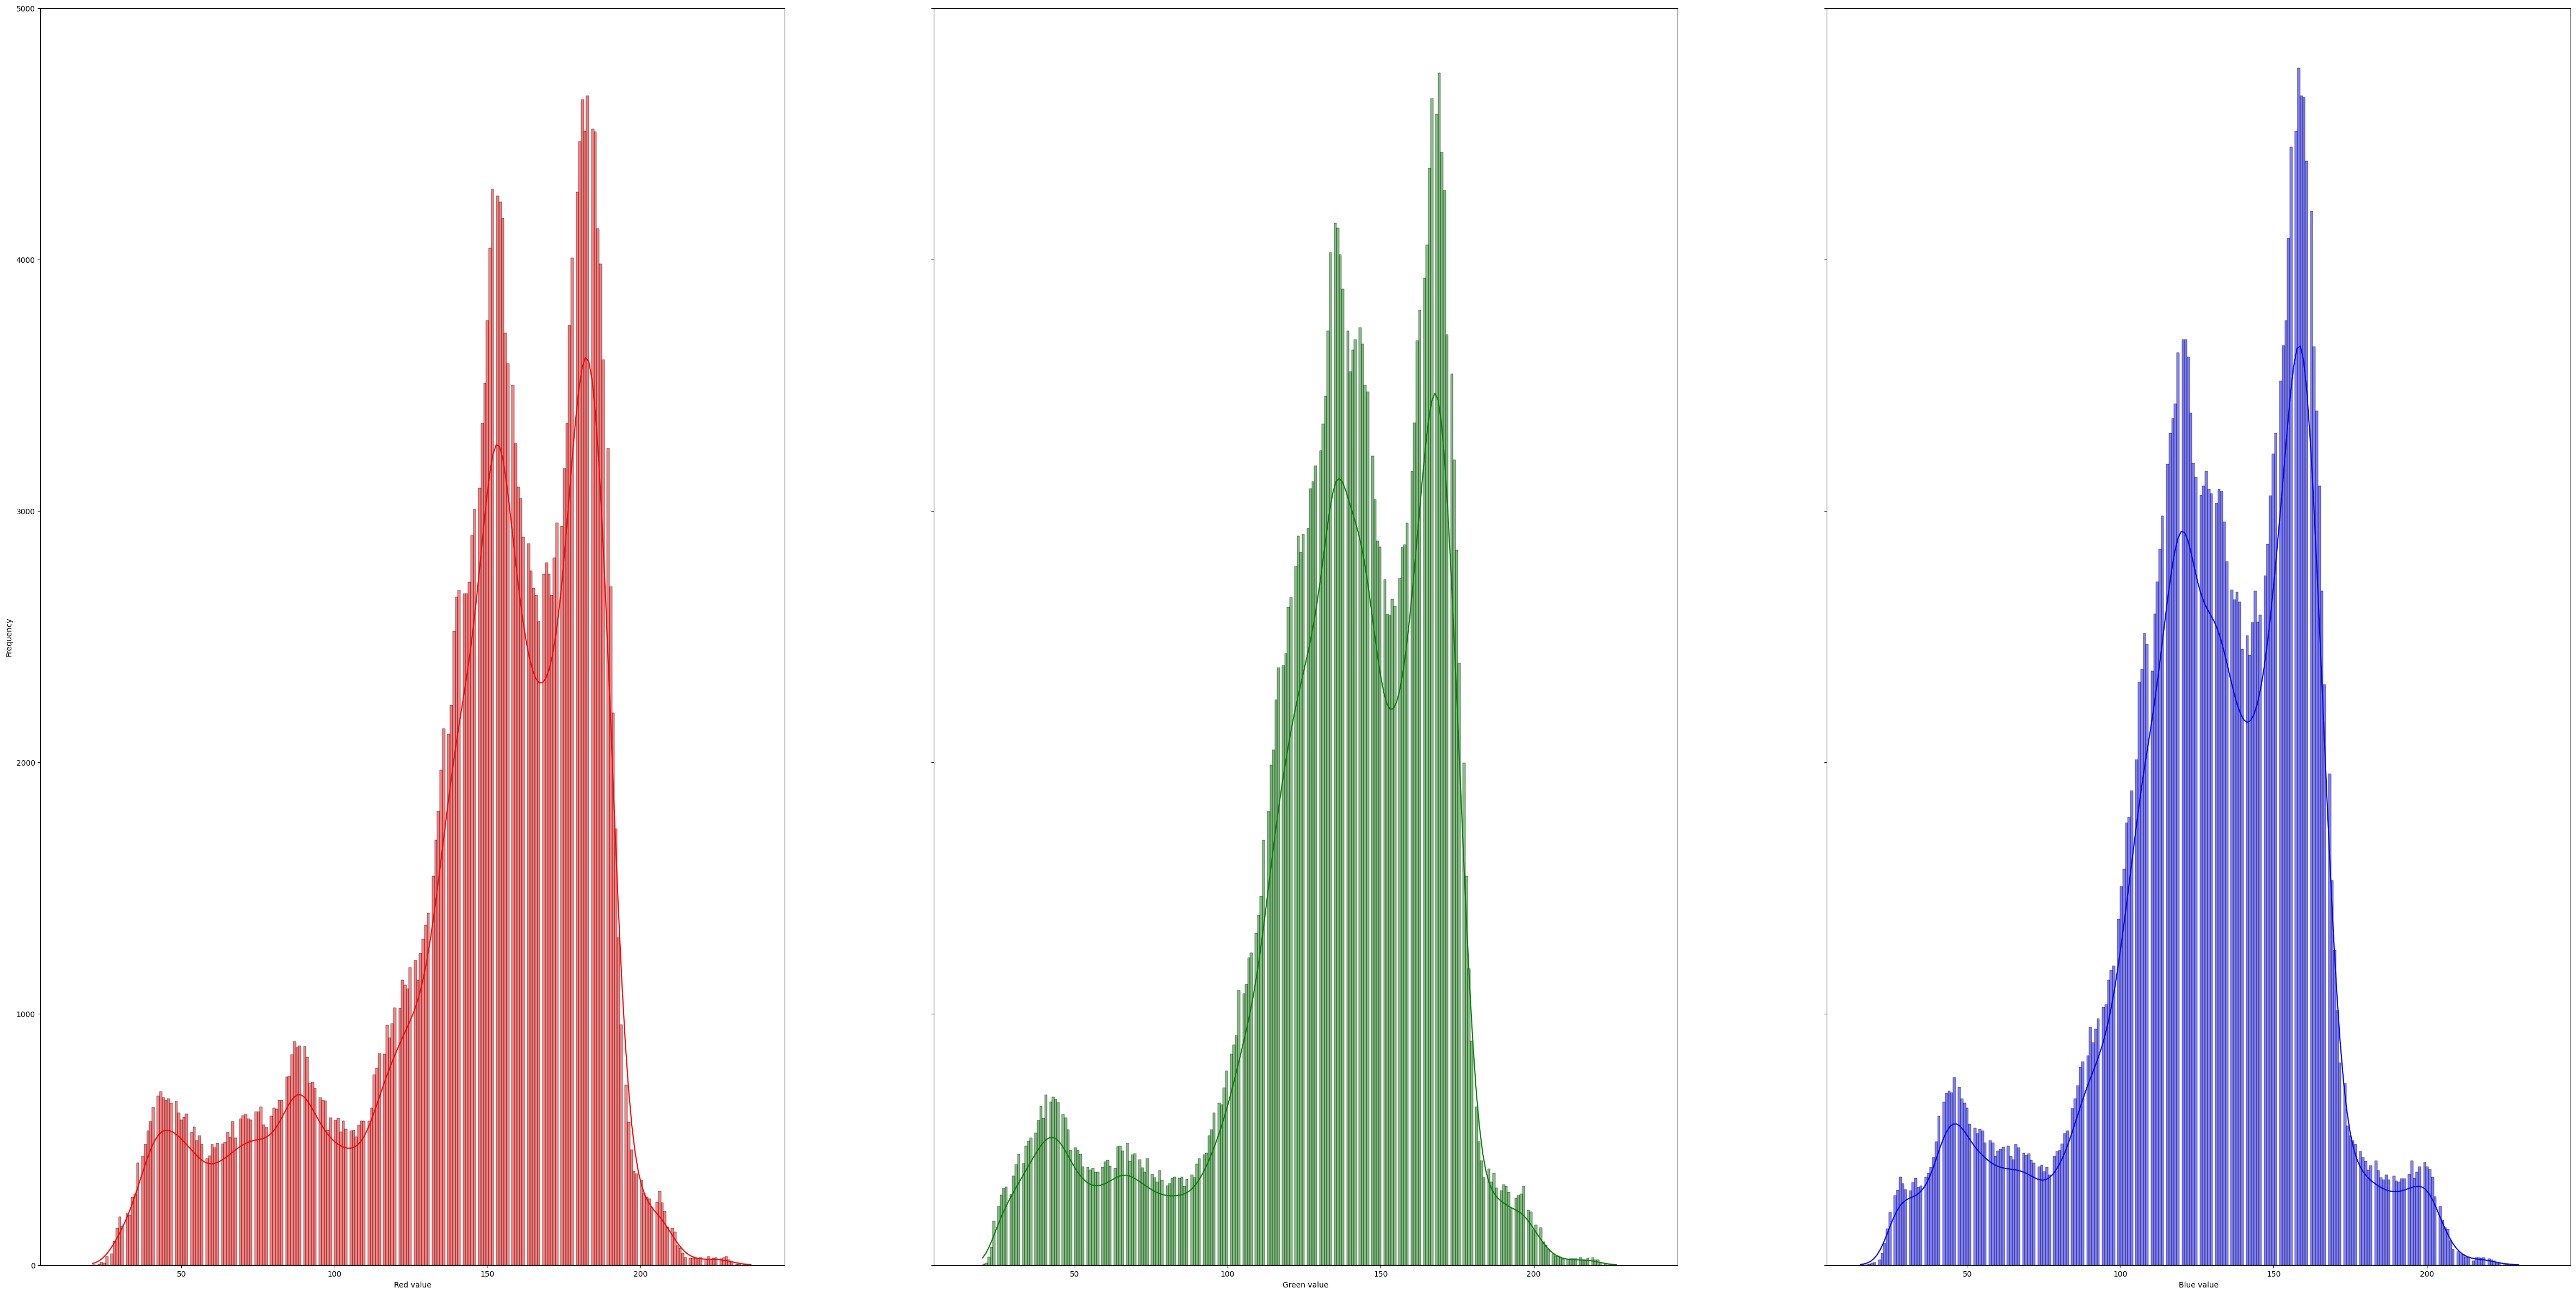

In [83]:
red_hist =  red.flatten()
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(60,30), sharex=True, sharey=True)
plt.subplot(1,3,1)
sns.histplot( red_hist, bins=256, kde=True,color='red')
plt.xlabel("Red value")
plt.ylabel("Frequency")

green_hist =  green.flatten()

plt.subplot(1,3,2)
sns.histplot( green_hist, bins=256, kde=True,color='green')
plt.xlabel("Green value")
plt.ylabel("Frequency")

blue_hist =  blue.flatten()

plt.subplot(1,3,3)
sns.histplot( blue_hist, bins=256, kde=True,color='blue')
plt.xlabel("Blue value")
plt.ylabel("Frequency")
plt.show()

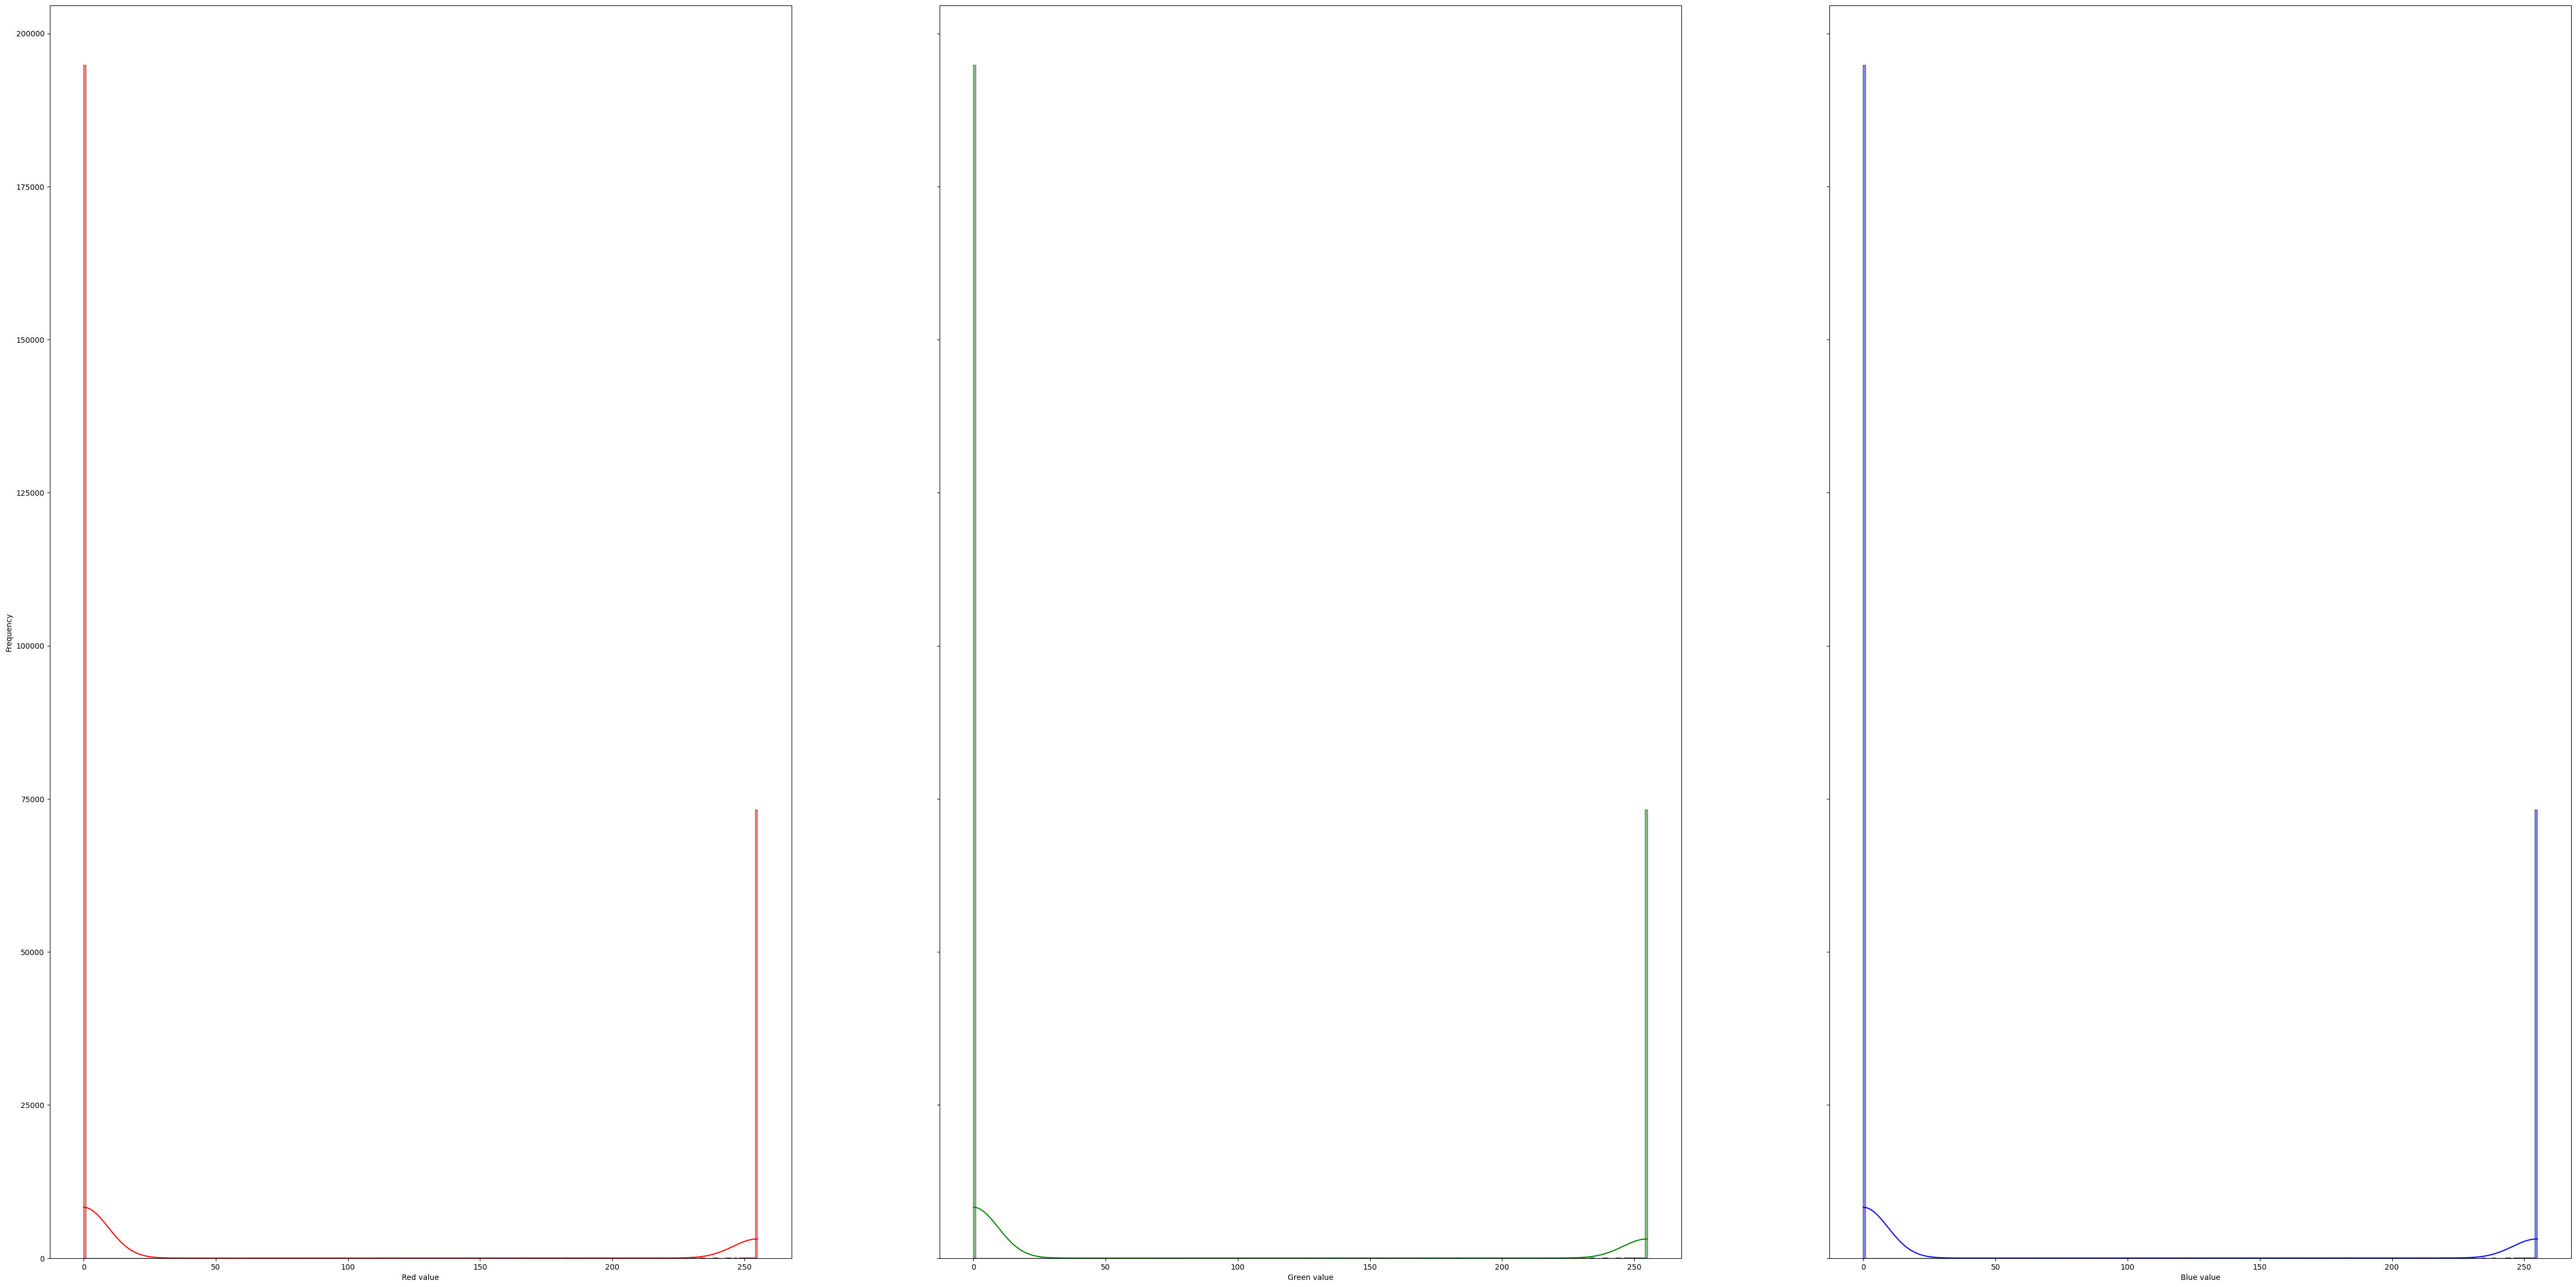

In [84]:
red_hist =  m_red.flatten()
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(60,30), sharex=True, sharey=True)
plt.subplot(1,3,1)
sns.histplot( red_hist, bins=256, kde=True,color='red')
plt.xlabel("Red value")
plt.ylabel("Frequency")

green_hist =  m_green.flatten()

plt.subplot(1,3,2)
sns.histplot( green_hist, bins=256, kde=True,color='green')
plt.xlabel("Green value")
plt.ylabel("Frequency")

blue_hist =  m_blue.flatten()

plt.subplot(1,3,3)
sns.histplot( blue_hist, bins=256, kde=True,color='blue')
plt.xlabel("Blue value")
plt.ylabel("Frequency")
plt.show()

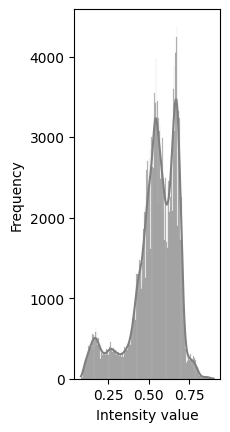

In [85]:
gray_hist =  gray_img.flatten()

plt.subplot(1,3,3)
sns.histplot( gray_hist, bins=256, kde=True,color='gray')
plt.xlabel("Intensity value")
plt.ylabel("Frequency")
plt.show()

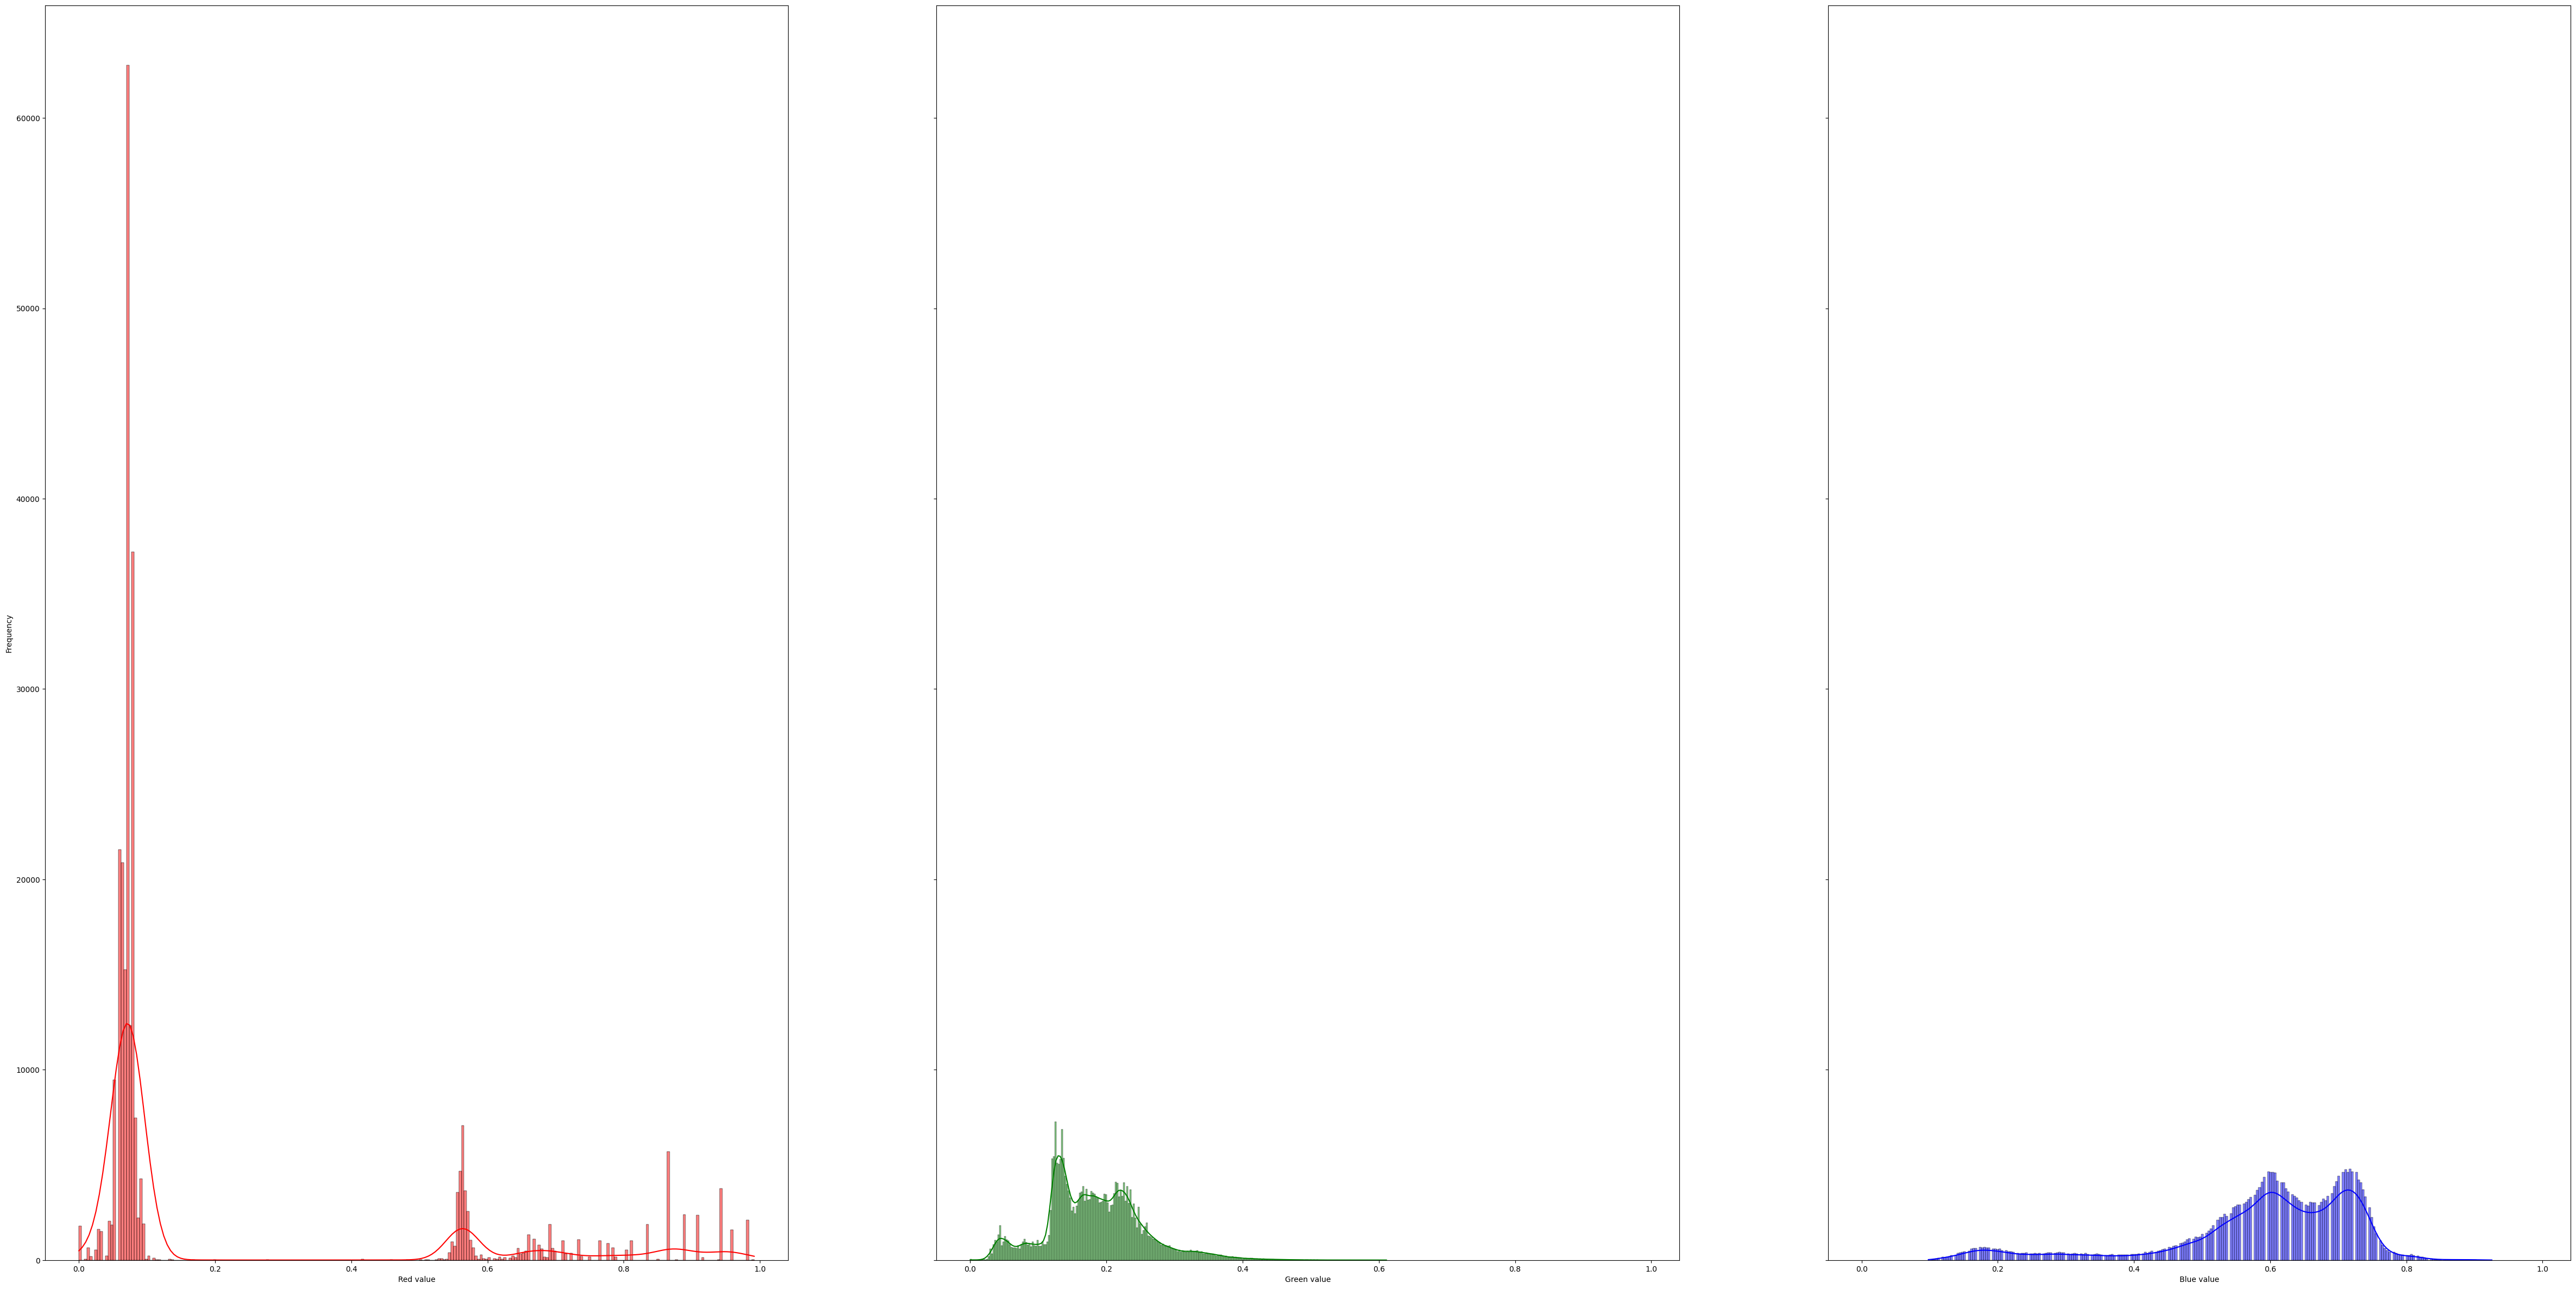

In [86]:
red_hist =  red_hsv.flatten()
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(60,30), sharex=True, sharey=True)
plt.subplot(1,3,1)
sns.histplot( red_hist, bins=256, kde=True,color='red')
plt.xlabel("Red value")
plt.ylabel("Frequency")

green_hist =  green_hsv.flatten()

plt.subplot(1,3,2)
sns.histplot( green_hist, bins=256, kde=True,color='green')
plt.xlabel("Green value")
plt.ylabel("Frequency")

blue_hist =  blue_hsv.flatten()

plt.subplot(1,3,3)
sns.histplot( blue_hist, bins=256, kde=True,color='blue')
plt.xlabel("Blue value")
plt.ylabel("Frequency")
plt.show()

# 5 BackGround classifier

In [87]:
# # 1
# # construct custom filter

# def custom_filter(size):
#     return np.ones((size,size))

# def convolve_filter(image,filter:np.array):
#     # Pad the image
#     size = len(filter)
#     padding_size = size//2
#     padded_image = np.pad(image, pad_width=padding_size, mode='constant', constant_values=0)
#     # flip the filter
#     flipped_filter = np.flipud(np.fliplr(filter))
#     # convolution
    
#     return_image = np.zeros_like(image)
#     #iterate over the padded image
#     for x in range(len(image)):
#         for y in range(len(image[0])):
            
#             region = padded_image[
#                 x:x+size,
#                 y:y+size
#                 ]
            
#             conv_value = np.sum(region * flipped_filter)
#             return_image[x,y] = conv_value
#     return return_image       
        
# def convolve_rgb(image,filter):
#     # this code splits the image into each channel, convolves then merges the channels
#     red, green, blue = cv2.split(image)          
#     red = convolve_filter(red,filter)
#     green = convolve_filter(green,filter)
#     blue = convolve_filter(blue,filter)
#     rgb_image = cv2.merge([red,green,blue])
#     return rgb_image

# vertical_prewitt = np.array([
#     [1,1,1],
#     [0,0,0],
#     [-1,-1,-1]
# ])
# horizontal_prewitt = np.array([
#     [1,0,-1],
#     [1,0,-1],
#     [1,0,-1]
# ])

# laplacian = np.array([
#     [0,-1,0],
#     [-1,4,-1],
#     [0,-1,0]
# ])

# image = cv2.imread("images/image-83.jpg")

# # Calculate convolved images
# resultant_vert_prewitt = convolve_rgb(image,vertical_prewitt)
# resultant_horz_prewitt = convolve_rgb(image,horizontal_prewitt)
# resultant_laplacian = convolve_rgb(image,laplacian)
# # display images
# fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# axes[0].imshow(resultant_vert_prewitt)
# axes[0].set_title('vert_prewit')
# axes[0].axis('off')

# axes[1].imshow(resultant_horz_prewitt)
# axes[1].set_title('horz_prewitt')
# axes[1].axis('off')

# axes[2].imshow(resultant_laplacian)
# axes[2].set_title('laplacian')
# axes[2].axis('off')
# plt.tight_layout()
# plt.show()

From the documentation it shows that the filter2D function does not execute convolution, it actually does cross-correlation

In [88]:

# image = cv2.imread("images/Documentation.png")
# plt.imshow(image)
# plt.show()

In [89]:
from skimage.io import imread, imshow

from skimage.filters import prewitt_v, prewitt_h, laplace, threshold_otsu
import cv2
# recalculating the prewitt and laplapcian to be use in this question.
# Using RGB formatting
original = imread("Images/image-35.jpg")
null = np.ones_like(original)
mask = imread("Images/mask-35.png", as_gray=True)
null = np.ones_like(mask)
inverse_mask = 1-mask 


In [90]:

def getFeatures(training_img, mask, show_plot=True):
    binary_mask = mask>0.5
    #plt.imshow(binary_mask)
    
    #add dimensions
    # print(binary_mask.shape)
    hsv_training_img = cv2.cvtColor(training_img, cv2.COLOR_BGR2RGB)
    v,s,h = cv2.split(hsv_training_img)
    h, s,v = h*binary_mask, s*binary_mask, v*binary_mask
    # print(h.shape)
    b,g,r = cv2.split(training_img)
    r,g,b = r*binary_mask, g*binary_mask, b*binary_mask

    # get vertical prewitt for separated channels
    vert_prewitt_r = prewitt_v(image=r)
    vert_prewitt_g = prewitt_v(image=g)
    vert_prewitt_b = prewitt_v(image=b)

    # get horizontal prewitt for separated channels
    hori_prewitt_r = prewitt_h(image=r)
    hori_prewitt_g = prewitt_h(image=g)
    hori_prewitt_b = prewitt_h(image=b)

    # get Laplacian for separated channels
    laplace_r = laplace(image=r)
    laplace_g = laplace(image=g)
    laplace_b = laplace(image=b)


    if show_plot:
        # vertical prewitt plot 
        fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(16,4))
        plt.subplot(1,3,1), plt.imshow( vert_prewitt_r,cmap="gray"), plt.axis("off")
        plt.subplot(1,3,2), plt.imshow( vert_prewitt_g,cmap="gray"), plt.axis("off")
        plt.subplot(1,3,3), plt.imshow( vert_prewitt_b,cmap="gray"), plt.axis("off")
        plt.suptitle("Vertical Prewitt of RGB image")
        plt.show()

        # horizontal prewitt plot
        fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(16,4))
        plt.subplot(1,3,1), plt.imshow( hori_prewitt_r,cmap="gray"), plt.axis("off")
        plt.subplot(1,3,2), plt.imshow( hori_prewitt_g,cmap="gray"), plt.axis("off")
        plt.subplot(1,3,3), plt.imshow( hori_prewitt_b,cmap="gray"), plt.axis("off")
        plt.suptitle("Horizontal Prewitt of RGB image")
        plt.show()

        # laplace plot
        fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(16,4))
        plt.subplot(1,3,1), plt.imshow( laplace_r,cmap="gray"), plt.axis("off")
        plt.subplot(1,3,2), plt.imshow( laplace_g,cmap="gray"), plt.axis("off")
        plt.subplot(1,3,3), plt.imshow( laplace_b,cmap="gray"), plt.axis("off")
        plt.suptitle("Laplacian of RGB image")
        plt.show()

    features = [
        vert_prewitt_r, hori_prewitt_r,
        vert_prewitt_g, hori_prewitt_g,
        vert_prewitt_b, hori_prewitt_b,
        laplace_r, laplace_g, laplace_b,
        r, g, b,
        h, s, v
    ]

    flattened_features = np.array([f[binary_mask].flatten() for f in features])

    return np.array(flattened_features)

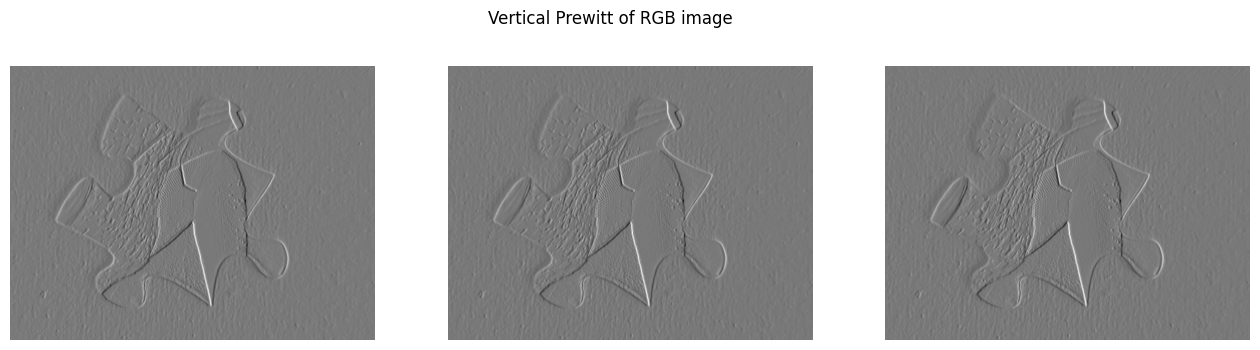

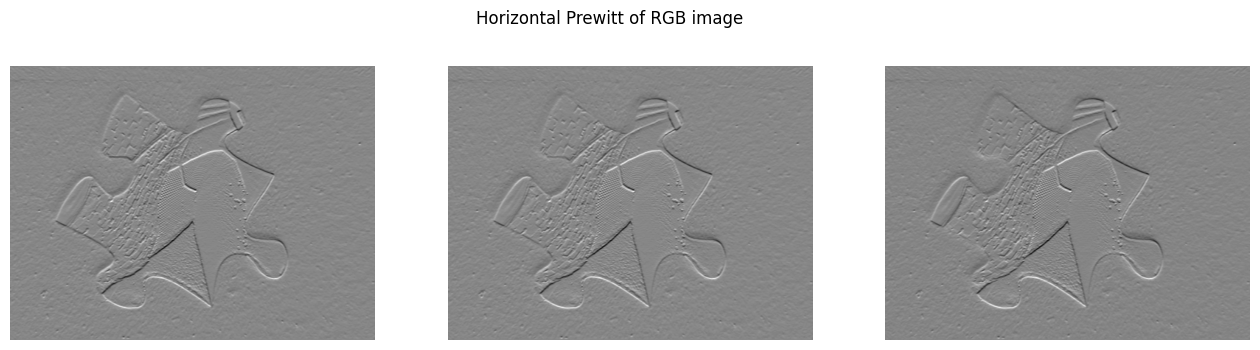

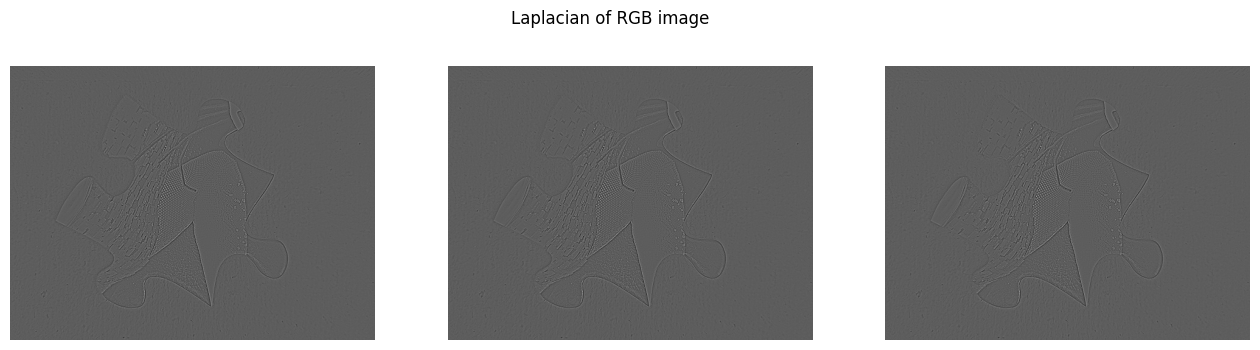

(270000,)
(74573,)
(195427,)


In [91]:
#plt.imshow(mask)
#plt.imshow(inverse_mask)
#print((mask+inverse_mask))

# get the feature for fg and bg
original_features = getFeatures(original, null)
print(original_features[0].shape)
fg_features = getFeatures(original, mask, show_plot=False)
print(fg_features[0].shape)
bg_features = getFeatures(original, inverse_mask, show_plot=False)
print(bg_features[0].shape)

Mean and covariance matrix


In [92]:

#make each feature a row in the matrix
original_feature_matrix = np.stack(original_features, axis=-1)
# print(original_feature.shape)
# original_mean_vector = np.mean(original_feature_matrix, axis=0)
# original_cov_matrix = np.cov(original_feature_matrix, rowvar=False)
# print(original_mean_vector.shape)
# print(original_cov_matrix.shape)

fg_feature_matrix = np.stack(fg_features, axis=-1)
fg_mean_vector = np.mean(fg_feature_matrix, axis=0)
fg_cov_matrix = np.cov(fg_feature_matrix, rowvar=False)
print(fg_mean_vector.shape)
print(fg_cov_matrix.shape)



#make each feature a row in the matrix
print(fg_features.shape)
bg_feature_matrix = np.stack(bg_features, axis=-1)
bg_mean_vector = np.mean(bg_feature_matrix, axis=0)
bg_cov_matrix = np.cov(bg_feature_matrix, rowvar=False)
print(bg_mean_vector.shape)
print(bg_cov_matrix.shape)

(15,)
(15, 15)
(15, 74573)
(15,)
(15, 15)


In [93]:
# definition of Bayes rule
from scipy.stats import multivariate_normal
N = original.shape[0]*original.shape[1]
N_fg = np.sum(mask)
N_bg = N - N_fg

def foreground_given_pixel(x,fg_mean, fg_cov, bg_mean, bg_cov):
    numerator = multivariate_normal.pdf( x, mean = fg_mean, cov= fg_cov, allow_singular=True) * (N_fg)
    denominator = multivariate_normal.pdf(x, mean=fg_mean, cov=fg_cov, allow_singular=True)*N_fg \
                + multivariate_normal.pdf( x, mean= bg_mean, cov= bg_cov, allow_singular=True) * (N_bg)
    probability = numerator/denominator
    return probability


In [94]:
def getPixelFeatures(features,row, col):
    pixel_coordinate = row*600 + col
    pixel_features= []
    for f in features:
        pixel_features.append(f[pixel_coordinate])
    return pixel_features

# Question 5 on the validation image

In [95]:
validation_img = imread("Images/image-83.jpg")
# this is only used for the accuracy measure since it represents the foreground
validation_mask = imread("Images/mask-83.png", as_gray=True)
# use null mask since we want to classify evey pixel in the validation image
validation_features  = getFeatures(validation_img, null, show_plot=False)

pixel = getPixelFeatures(validation_features, row = 5, col=70)
test = foreground_given_pixel(pixel, fg_mean_vector, fg_cov_matrix, bg_mean_vector, bg_cov_matrix)

print(test)

1.7213583346399895e-08


# Sanity check Does this classifier even work?
regen image based on the predictions to see if its right

In [96]:
# doing the features all at once instead
def vectorized_prediction(validation_features, fg_mean_vector,fg_cov_matrix,bg_mean_vector,bg_cov_matrix):
    #transpose to make each column a feature vector for a pixel
    reshaped_features = validation_features.T
    #vector of predictions
    probabilities = foreground_given_pixel(reshaped_features, fg_mean_vector, fg_cov_matrix, bg_mean_vector, bg_cov_matrix)
    #shape back to image
    height, width = 450, 600
    predictions_reshaped = probabilities.reshape(height, width)
    
    return predictions_reshaped

In [97]:

verify_img = np.zeros_like(mask)
print(validation_features.shape)
# for row in range(verify_img.shape[0]):
#     for col in range(verify_img.shape[1]):
#         pixel = getPixelFeatures(validation_features, row, col)
#         prediction = foreground_given_pixel(pixel,fg_mean_vector, fg_cov_matrix, bg_mean_vector, bg_cov_matrix)
#         if prediction:
#             verify_img[row][col] = prediction

### USING THE VECTORISED APPROACH
verify_img = vectorized_prediction(validation_features, fg_mean_vector, fg_cov_matrix, bg_mean_vector, bg_cov_matrix)

(15, 270000)


C:\Users\Oriin\AppData\Local\Temp\ipykernel_19752\1269754459.py:11: RuntimeWarning: invalid value encountered in divide
  probability = numerator/denominator


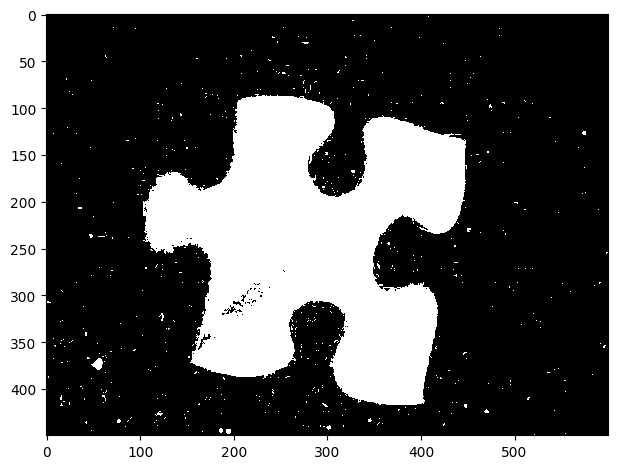

In [98]:
theta = 0.5
thresholded_img = verify_img.copy() > theta
imshow(thresholded_img)

### Accuracy, Precision, recall and F1 score on validation image
set $\Theta$ = {10, 20, 30, 40, 50, 60, 70, 80, 90, 95}

In [99]:
from sklearn.metrics import classification_report
# when theta = 0.8
print(thresholded_img.shape)
### NOTE have to use the img we put through the classifier
### NOTE I am being careless with naming variables
verify_img = thresholded_img.astype(int).flatten()
validation_mask =( validation_mask > 0.99).astype(int).flatten()
print(classification_report(validation_mask, verify_img))

(450, 600)
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    210968
           1       0.88      1.00      0.94     59032

    accuracy                           0.97    270000
   macro avg       0.94      0.98      0.96    270000
weighted avg       0.97      0.97      0.97    270000



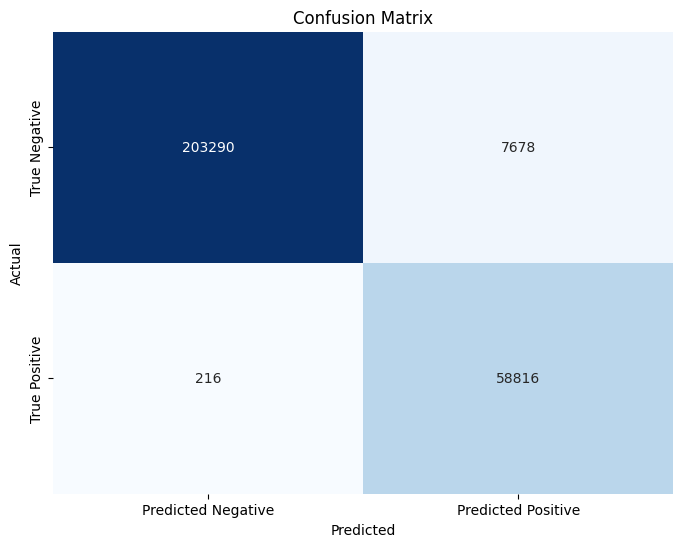

In [100]:
import seaborn as sns 
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(validation_mask, verify_img)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

*NOTE* the ROC curve is a measure of true positive rate against the False positive rate
$$TPR = \frac{TP}{TP+FN}$$
and
$$FPR = \frac{FP}{FP+TN}

In [101]:
def roc(TP, TN, FP, FN):
    TPR = TP/(TP+FN)
    FPR = FP/(FP+TN)

    return FPR, TPR

In [102]:
print(conf_matrix)

[[203290   7678]
 [   216  58816]]


In [103]:
# getting FPR, TPR and plotting
from sklearn.metrics import auc
from tqdm import tqdm

# fpr, tpr = roc(conf_matrix[1][1], conf_matrix[0][0], conf_matrix[0][1], conf_matrix[1][0])

verify_img = np.zeros_like(mask)

verify_img = vectorized_prediction(validation_features,fg_mean_vector, fg_cov_matrix, bg_mean_vector, bg_cov_matrix)



C:\Users\Oriin\AppData\Local\Temp\ipykernel_19752\1269754459.py:11: RuntimeWarning: invalid value encountered in divide
  probability = numerator/denominator


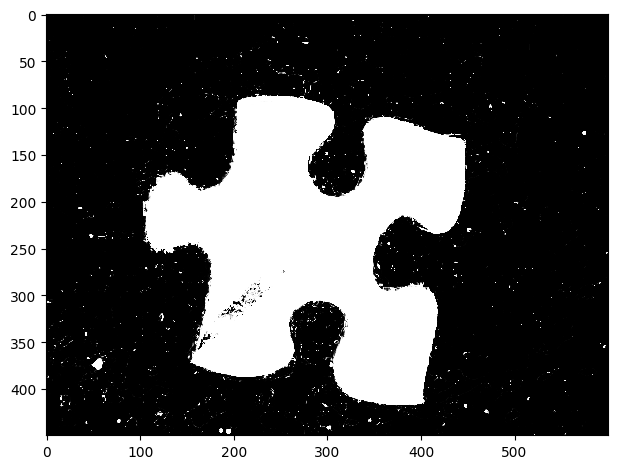

In [104]:
imshow(verify_img)

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]


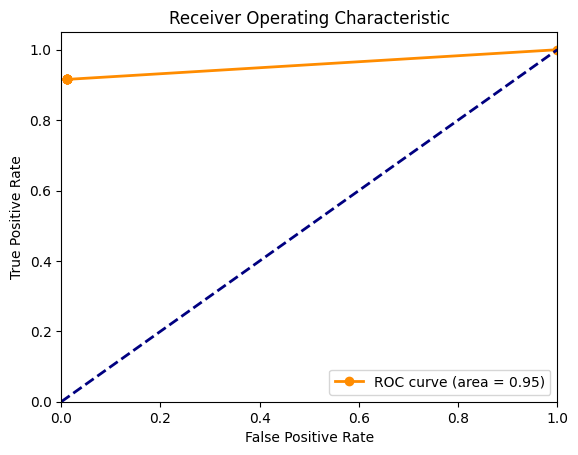

In [105]:
from sklearn.metrics import roc_curve
theta = np.linspace(0.0, 1.0, 10)
print(theta)

validation_mask = imread("Images/mask-83.png", as_gray=True)
validation_mask  = (validation_mask >0.99).astype(int).flatten()

tpr_values = []
fpr_values = []

for thresh in theta:
    # Apply threshold to get binary predictions
    thresholded_img = np.where(verify_img > thresh, verify_img, 0).flatten()
    
    # Calculate FPR and TPR
    fpr, tpr, _ = roc_curve(validation_mask, thresholded_img)
    
    # Store FPR and TPR values
    tpr_values.append(tpr[1])  # True Positive Rate (Recall)
    fpr_values.append(fpr[1])  # False Positive Rate

# Calculate AUC
roc_auc = auc(fpr_values, tpr_values)

# tpr_values = np.array(tpr_values )
# fpr_values = np.array(fpr_values )
plt.figure()
plt.plot(fpr_values, tpr_values, marker='o', color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



In [106]:
print(tpr_values)
print(fpr_values)

[0.9157236752947554, 0.9157236752947554, 0.9157236752947554, 0.9157236752947554, 0.9157236752947554, 0.9157236752947554, 0.9157236752947554, 0.9157236752947554, 0.9157236752947554, 1.0]
[0.011944939516893557, 0.011944939516893557, 0.011944939516893557, 0.011944939516893557, 0.011944939516893557, 0.011944939516893557, 0.011944939516893557, 0.011944939516893557, 0.011944939516893557, 1.0]


Intersection over Union

In [113]:
def get_IOU(img,mask):

    intersection = np.logical_and(img, mask)

    union = np.logical_or(img, mask)

    iou_score = np.sum(intersection) / np.sum(union)

    return(iou_score)

In [114]:
get_IOU(verify_img.flatten(),validation_mask)

0.21863703703703705